In [666]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib as joblib


In [667]:
df=pd.read_csv('csse_covid_19_daily_reports_us.csv')
pd.set_option('display.float_format', '{:.2f}'.format)

df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.32,-86.90,13052,522,nan,12530.00,1,266.19,164450.00,1493.00,4.00,84000001,USA,3353.94,11.44
1,Alaska,US,2020-05-21 02:32:54,61.37,-152.40,401,10,352.00,39.00,2,54.82,37045.00,nan,2.49,84000002,USA,5063.94,nan
2,American Samoa,US,2020-05-21 02:32:54,-14.27,-170.13,0,0,nan,0.00,60,0.00,124.00,nan,nan,16,ASM,222.86,nan
3,Arizona,US,2020-05-21 02:32:54,33.73,-111.43,14906,747,3773.00,10386.00,4,204.79,165435.00,1792.00,5.01,84000004,USA,2272.86,12.02
4,Arkansas,US,2020-05-21 02:32:54,34.97,-92.37,5003,107,3852.00,1044.00,5,165.78,96258.00,535.00,2.14,84000005,USA,3189.67,10.69
5,California,US,2020-05-21 02:32:54,36.12,-119.68,85997,3497,nan,82500.00,6,217.65,1380120.00,nan,4.07,84000006,USA,3492.89,nan
6,Colorado,US,2020-05-21 02:32:54,39.06,-105.31,22797,1299,3478.00,18020.00,8,395.87,131837.00,3955.00,5.70,84000008,USA,2289.34,17.35
7,Connecticut,US,2020-05-21 02:32:54,41.60,-72.76,39017,3529,6264.00,29224.00,9,1094.36,190718.00,10946.00,9.04,84000009,USA,5349.30,28.05
8,Delaware,US,2020-05-21 02:32:54,39.32,-75.51,8194,310,3965.00,3919.00,10,841.48,45412.00,nan,3.78,84000010,USA,4663.55,nan
9,Diamond Princess,US,2020-05-21 02:32:54,nan,nan,49,0,nan,49.00,88888,nan,nan,nan,0.00,84088888,USA,nan,nan


In [668]:
#removing UID column as it is just an identity column
df=df.drop('UID',axis=1)
df.shape

(58, 17)

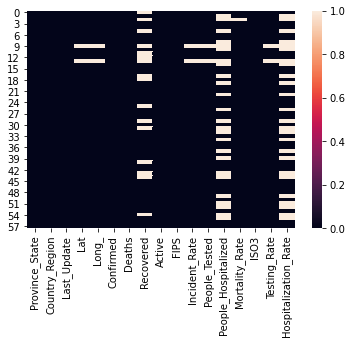

In [669]:
sns.heatmap(df.isnull())

In [670]:
#missing value present in dataset
#Lets replace null values with mean incase of number and mode in case of string 
for col in df.columns:
    if(is_string_dtype(df[col])):
        impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
        df[col]=impute.fit_transform(df[[col]]).ravel()
    else:   
        impute=SimpleImputer(missing_values=np.nan,strategy='mean')
        df[col]=impute.fit_transform(df[[col]]).ravel()

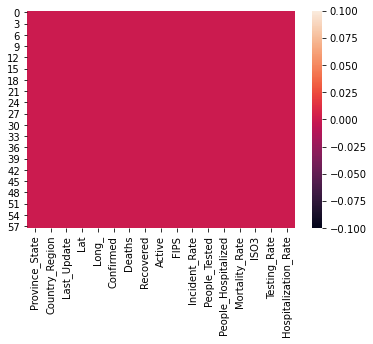

In [671]:

sns.heatmap(data=df.isnull())

In [672]:
#now thr is no missing values
df.isin(['?']).sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [673]:

#Lets print unique values for each column
for col in df.columns:
    print("***************",col,"************")
    print(df[col].value_counts())
    print('\n')

*************** Province_State ************
Nebraska                    1
North Dakota                1
Tennessee                   1
Virginia                    1
Texas                       1
Florida                     1
New Mexico                  1
Arkansas                    1
Missouri                    1
Guam                        1
Utah                        1
Delaware                    1
Washington                  1
Northern Mariana Islands    1
Minnesota                   1
Louisiana                   1
Vermont                     1
Nevada                      1
Diamond Princess            1
Kansas                      1
Puerto Rico                 1
Ohio                        1
Colorado                    1
Wyoming                     1
Alaska                      1
Oklahoma                    1
West Virginia               1
Massachusetts               1
Montana                     1
Maryland                    1
Virgin Islands              1
Iowa                      

In [674]:
#Country_Region has same repeated data .We can drop this column
df=df.drop('Country_Region',axis=1)
df.shape

(58, 16)

In [675]:
df[df.Province_State=='Louisiana']

,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
22,Louisiana,2020-05-21 02:32:54,31.17,-91.87,35316.00,2608.00,26249.00,6459.00,22.00,759.68,285970.00,4897.45,7.38,USA,6151.49,14.34


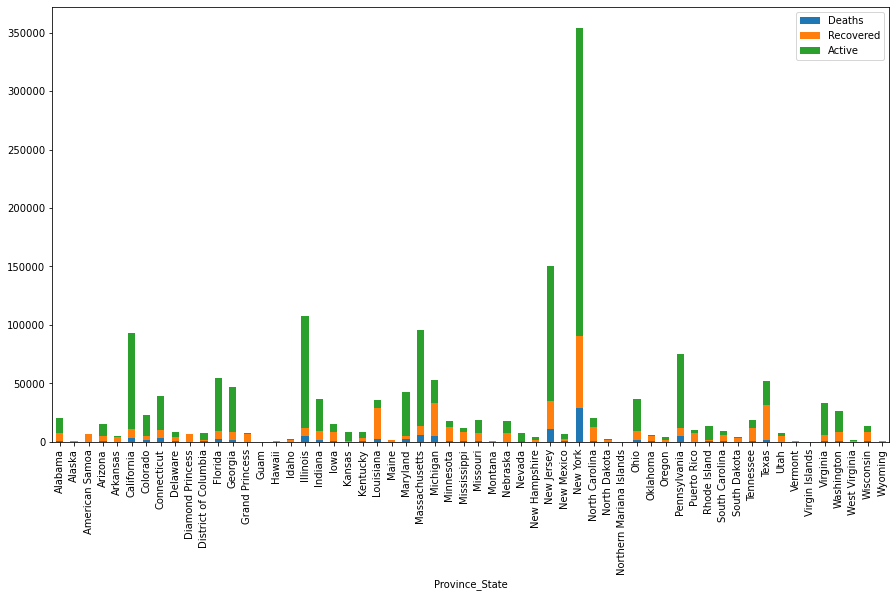

In [676]:

df_sample=pd.DataFrame(columns={'Province_State':[],'Deaths':[],'Recovered':[],'Active':[]})
df_sample['Province_State']=df['Province_State']
df_sample['Deaths']=df['Deaths']
df_sample['Recovered']=df['Recovered']
df_sample['Active']=df['Active']
df_sample=df_sample.set_index('Province_State')

df_sample.plot(kind='bar',stacked=True,figsize=(15,8))
#NewYork city has more covid case and % of death,active and recover is also more comapre to other city..



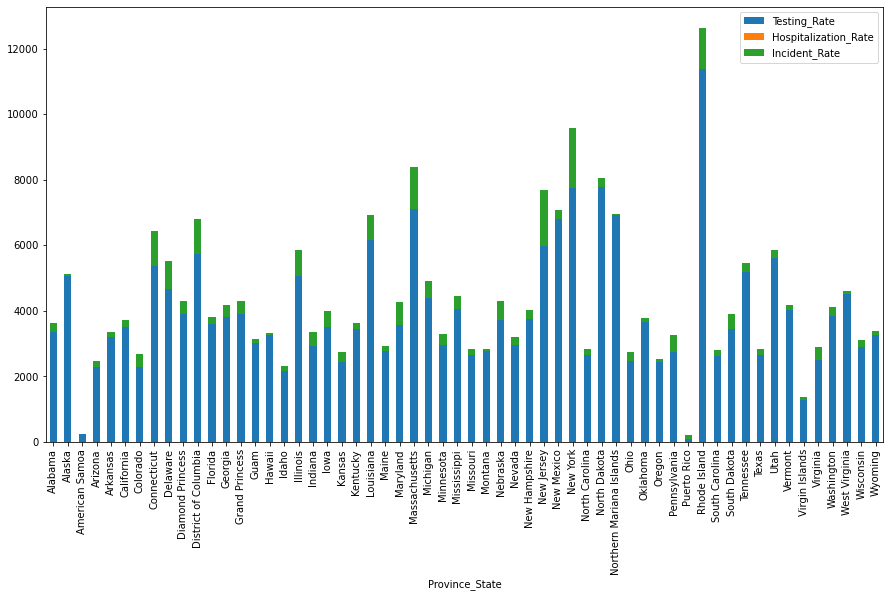

In [677]:
df_sample1=pd.DataFrame(columns={'Province_State':[],'Testing_Rate':[],'Hospitalization_Rate':[]})
df_sample1['Province_State']=df['Province_State']
df_sample1['Testing_Rate']=df['Testing_Rate']
df_sample1['Incident_Rate']=df['Incident_Rate']
df_sample1=df_sample1.set_index('Province_State')



df_sample1.plot(kind='bar',stacked=True,figsize=(15,8))
#Rhode Island has more testing rate  ..
#city with more testing rate has more incident rate 

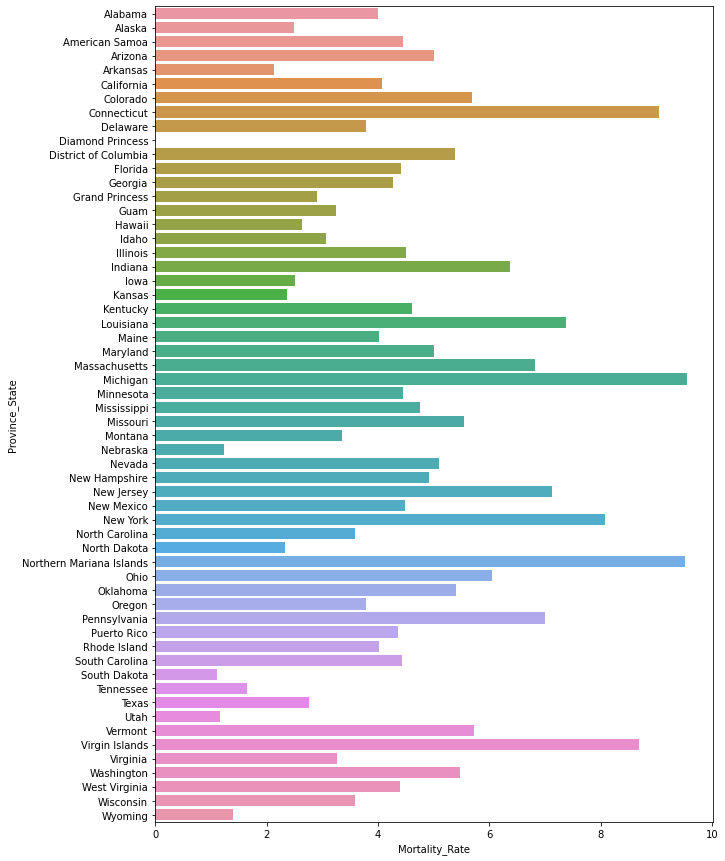

In [678]:
plt.figure(figsize=(10,15))
sns.barplot(data=df,y='Province_State',x='Mortality_Rate')
#Michhigan city having more death rate .

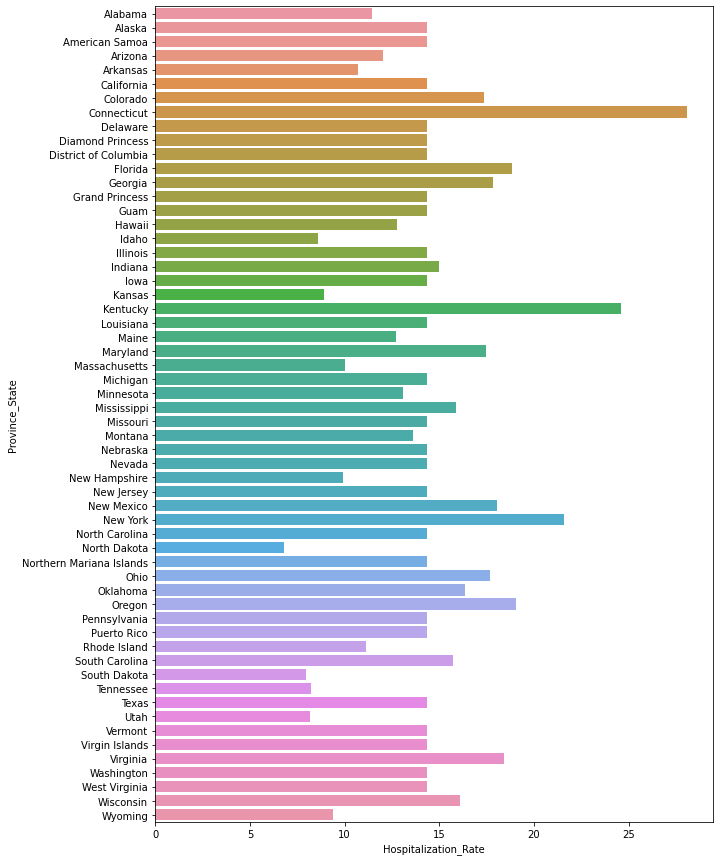

In [679]:
plt.figure(figsize=(10,15))
sns.barplot(data=df,y='Province_State',x='Hospitalization_Rate')
#Connecticut city having more Hospitalization_Rate .

In [680]:
#convert string data to int
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

In [681]:
df.dtypes

Province_State            int32
Last_Update               int32
Lat                     float64
Long_                   float64
Confirmed               float64
Deaths                  float64
Recovered               float64
Active                  float64
FIPS                    float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
ISO3                      int32
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [682]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     int32  
 1   Last_Update           58 non-null     int32  
 2   Lat                   58 non-null     float64
 3   Long_                 58 non-null     float64
 4   Confirmed             58 non-null     float64
 5   Deaths                58 non-null     float64
 6   Recovered             58 non-null     float64
 7   Active                58 non-null     float64
 8   FIPS                  58 non-null     float64
 9   Incident_Rate         58 non-null     float64
 10  People_Tested         58 non-null     float64
 11  People_Hospitalized   58 non-null     float64
 12  Mortality_Rate        58 non-null     float64
 13  ISO3                  58 non-null     int32  
 14  Testing_Rate          58 non-null     float64
 15  Hospitalization_Rate  58 

In [683]:
df.describe()

,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
count,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00
mean,28.50,0.00,36.84,-85.21,26756.09,1611.02,7007.43,20070.72,3288.09,396.23,225853.41,4897.45,4.46,3.84,3894.19,14.34
std,16.89,0.00,10.69,48.87,52562.03,4084.75,9901.30,41294.71,17408.35,395.55,293494.75,9879.58,2.12,0.72,1898.95,3.78
min,0.00,0.00,-14.27,-170.13,0.00,0.00,13.00,0.00,1.00,0.00,124.00,65.00,0.00,0.00,97.70,6.78
25%,14.25,0.00,34.87,-99.70,2596.00,74.00,1281.75,812.50,18.25,154.91,47450.00,1454.50,3.12,4.00,2741.84,12.83
50%,28.50,0.00,38.98,-86.80,10148.50,385.00,4987.00,5644.50,32.50,259.01,143308.50,4897.45,4.41,4.00,3501.53,14.34
75%,42.75,0.00,42.21,-77.07,29395.50,1394.25,7007.43,19291.25,47.75,462.83,264665.60,4897.45,5.45,4.00,4622.59,15.55
max,57.00,0.00,61.37,145.67,354370.00,28636.00,61886.00,263848.00,99999.00,1821.62,1505836.00,76410.00,9.55,5.00,11377.42,28.05


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E65879520>,
      dtype=object)

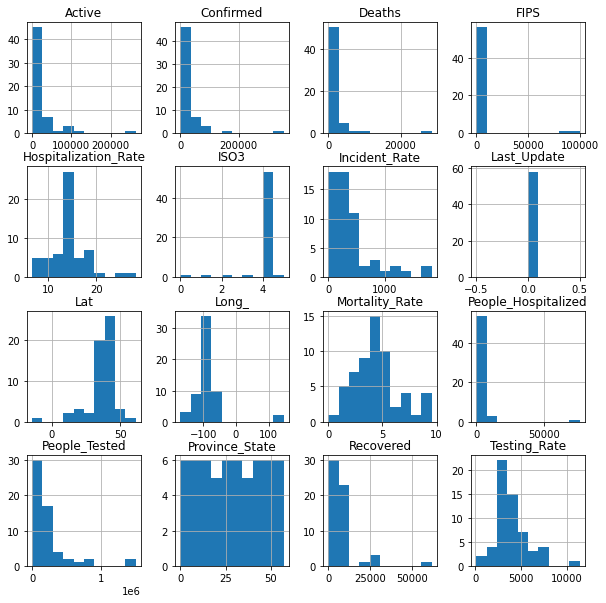

In [684]:
#confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Testing_Rate having skewed data
#Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Hospitalized,Testing_Rate having outliers
df.hist(figsize=(10,10))

In [685]:
#People_Tested,Recovered,Incident_Rate,Acitve column has skewed data
df.skew()

Province_State          0.00
Last_Update             0.00
Lat                    -2.25
Long_                   3.57
Confirmed               4.71
Deaths                  5.49
Recovered               3.65
Active                  4.18
FIPS                    5.27
Incident_Rate           1.99
People_Tested           2.83
People_Hospitalized     6.87
Mortality_Rate          0.50
ISO3                   -4.13
Testing_Rate            1.31
Hospitalization_Rate    0.87
dtype: float64

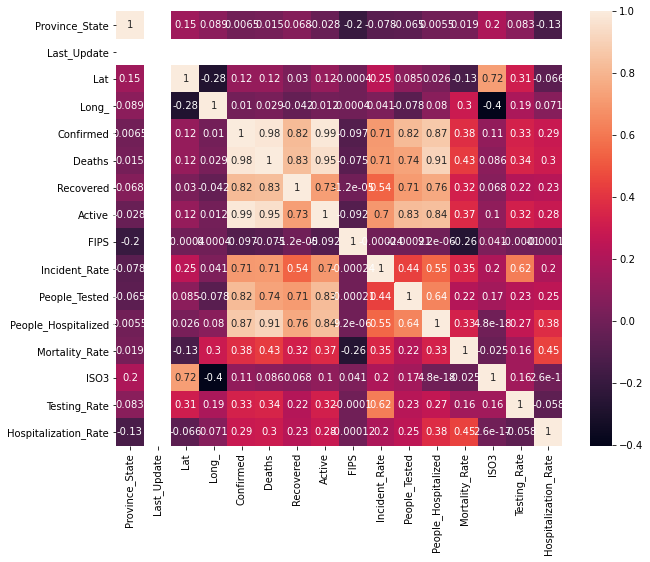

In [686]:
corr_=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=corr_,annot=True)

In [687]:
#drop last_update column 
df=df.drop('Last_Update',axis=1)

In [688]:
corr_
col1_=[]
col2_=[]
correl_=[]
#find corr btn features and target
for index_ in corr_.index:
    for col in corr_.columns:
        if(index_=='Deaths'):
            if(index_==col):
               pass 
            else:
                if(abs(corr_[col][index_])>0.5):
                    col1_.append(index_)
                    col2_.append(col)
                    correl_.append(abs(corr_[col][index_]))
                    
                
                    

In [689]:
df_corr=pd.DataFrame({'column1':col1_,'column2':col2_,'correlation':correl_})

df_corr.sort_values(by='correlation')    


,column1,column2,correlation
3,Deaths,Incident_Rate,0.71
4,Deaths,People_Tested,0.74
1,Deaths,Recovered,0.83
5,Deaths,People_Hospitalized,0.91
2,Deaths,Active,0.95
0,Deaths,Confirmed,0.98


In [690]:
#Find corelation between features
df[['Incident_Rate','People_Tested','Recovered','People_Hospitalized','Active','Confirmed']].corr()


,Incident_Rate,People_Tested,Recovered,People_Hospitalized,Active,Confirmed
Incident_Rate,1.00,0.44,0.54,0.55,0.70,0.71
People_Tested,0.44,1.00,0.71,0.64,0.83,0.82
Recovered,0.54,0.71,1.00,0.76,0.73,0.82
People_Hospitalized,0.55,0.64,0.76,1.00,0.84,0.87
Active,0.70,0.83,0.73,0.84,1.00,0.99
Confirmed,0.71,0.82,0.82,0.87,0.99,1.00


In [691]:
#from above output we can remove  confirmed column bcz it is  strongly corelated with rest of the column .
#SO we can drop this column
#df=df.drop('Confirmed',axis=1)
df_final=df[['Incident_Rate','People_Tested','Recovered','People_Hospitalized','Active','Deaths']]
df_final

,Incident_Rate,People_Tested,Recovered,People_Hospitalized,Active,Deaths
0,266.19,164450.00,7007.43,1493.00,12530.00,522.00
1,54.82,37045.00,352.00,4897.45,39.00,10.00
2,0.00,124.00,7007.43,4897.45,0.00,0.00
3,204.79,165435.00,3773.00,1792.00,10386.00,747.00
4,165.78,96258.00,3852.00,535.00,1044.00,107.00
5,217.65,1380120.00,7007.43,4897.45,82500.00,3497.00
6,395.87,131837.00,3478.00,3955.00,18020.00,1299.00
7,1094.36,190718.00,6264.00,10946.00,29224.00,3529.00
8,841.48,45412.00,3965.00,4897.45,3919.00,310.00
9,396.23,225853.41,7007.43,4897.45,49.00,0.00


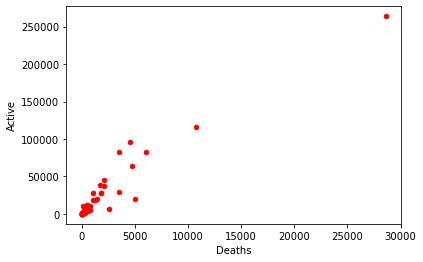

In [692]:
df_final.plot.scatter(x='Deaths',y='Active',c='red')

In [696]:
df_final.skew()

Incident_Rate         -1.81
People_Tested         -1.63
Recovered             -1.12
People_Hospitalized   -0.93
Active                -0.99
Deaths                -0.57
dtype: float64

In [694]:
#remove skewed data where skewness is > 0.55
for col in df_final.columns:
    if(df_final[col].skew()>0.55):
        df_final[col]=np.log1p(df_final[col])

<ipython-input-694-2315d7730763>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col]=np.log1p(df_final[col])


In [697]:
df_final

,Incident_Rate,People_Tested,Recovered,People_Hospitalized,Active,Deaths
0,5.59,12.01,8.85,7.31,9.44,6.26
1,4.02,10.52,5.87,8.50,3.69,2.40
2,0.00,4.83,8.85,8.50,0.00,0.00
3,5.33,12.02,8.24,7.49,9.25,6.62
4,5.12,11.47,8.26,6.28,6.95,4.68
5,5.39,14.14,8.85,8.50,11.32,8.16
6,5.98,11.79,8.15,8.28,9.80,7.17
7,7.00,12.16,8.74,9.30,10.28,8.17
8,6.74,10.72,8.29,8.50,8.27,5.74
9,5.98,12.33,8.85,8.50,3.91,0.00


Incident_Rate             AxesSubplot(0.125,0.657941;0.352273x0.222059)
People_Tested          AxesSubplot(0.547727,0.657941;0.352273x0.222059)
Recovered                 AxesSubplot(0.125,0.391471;0.352273x0.222059)
People_Hospitalized    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
Active                       AxesSubplot(0.125,0.125;0.352273x0.222059)
Deaths                    AxesSubplot(0.547727,0.125;0.352273x0.222059)
dtype: object

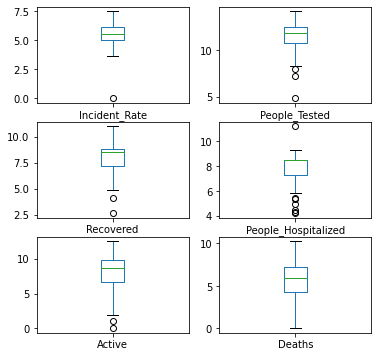

In [699]:
df_final.plot.box(layout=(3,2),figsize=(6,6),subplots=True)

In [700]:
#outlier in people_hospitaised and active column
#removing outlier
z=np.abs(zscore(df_final))
df_final=df_final[(z<3).all(axis=1)]
df_final.shape

(56, 6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E5F99DDC0>,
      dtype=object)

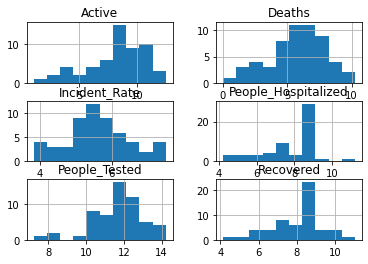

In [707]:
df_final.hist()

In [701]:
x=df_final.drop('Deaths',axis=1)
y=df_final['Deaths']
print(x.shape,y.shape)

(56, 5) (56,)


In [702]:
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x

array([[-6.72560782e-02,  2.37744351e-01,  5.24820003e-01,
        -3.13094111e-01,  5.00217686e-01],
       [-1.87789676e+00, -8.75466976e-01, -1.66284401e+00,
         5.50266646e-01, -1.85324687e+00],
       [-3.69189265e-01,  2.42204629e-01,  7.16960262e-02,
        -1.80453658e-01,  4.23373653e-01],
       [-6.12190102e-01, -1.62270329e-01,  8.68616634e-02,
        -1.05839105e+00, -5.17072590e-01],
       [-2.99111990e-01,  1.82662436e+00,  5.24820003e-01,
         5.50266646e-01,  1.27197475e+00],
       [ 3.90198794e-01,  7.26516118e-02,  1.21139304e-02,
         3.94903107e-01,  6.49004405e-01],
       [ 1.56408736e+00,  3.48425589e-01,  4.42731439e-01,
         1.13493162e+00,  8.46995156e-01],
       [ 1.26057644e+00, -7.23370757e-01,  1.08022325e-01,
         5.50266646e-01,  2.43250150e-02],
       [ 3.91254993e-01,  4.74717652e-01,  5.24820003e-01,
         5.50266646e-01, -1.76186824e+00],
       [ 1.53800592e+00, -8.10364376e-01, -8.57912007e-01,
         5.50266646e-01

In [704]:
lr_reg=LinearRegression()
lasso=Lasso()
ridge=Ridge()
svr=SVR()
dtree_reg=DecisionTreeRegressor()
kn_reg=KNeighborsRegressor()
sgd_reg=SGDRegressor()
gradient_reg=GradientBoostingRegressor()
ada_reg=AdaBoostRegressor()
rand_reg=RandomForestRegressor()

In [705]:
models=[]
models.append(('LinearRegression',lr_reg))
models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',dtree_reg))
models.append(('KNeighborsRegressor',kn_reg))
models.append(('SGDRegressor',sgd_reg))
models.append(('Gradient Boost Regressor',gradient_reg))
models.append(('Ada Boost Regressor',ada_reg ))
models.append(('RandomForestRegressor',rand_reg))

In [708]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [711]:
#finding and storing matrix model wise
cross_val_list=[]
mse_list=[]
model_name_list=[]
mae_list=[]
r2_score_list=[]
score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='r2').mean())
    r2_score_list.append(r2_score(y_test,y_pred))
    mse_list.append(mean_squared_error(y_test,y_pred))
    mae_list.append(mean_absolute_error(y_test,y_pred))
    score_list.append(reg_obj.score(x_train,y_train))
    model_name_list.append(reg_name)
    

In [713]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'r2_score':r2_score_list,'mse':mse_list,'mae':mae_list,'train_score':score_list})
df_matrix

,Estimator_Name,cross_val_Score,r2_score,mse,mae,train_score
0,LinearRegression,0.66,0.85,0.80,0.62,0.87
1,SVR,0.67,0.50,2.65,1.05,0.77
2,DecisionTreeRegressor,0.79,0.85,0.80,0.79,1.00
3,KNeighborsRegressor,0.78,0.68,1.69,0.85,0.79
4,SGDRegressor,0.75,0.81,1.04,0.67,0.85
5,Gradient Boost Regressor,0.79,0.96,0.20,0.36,1.00
6,Ada Boost Regressor,0.76,0.90,0.54,0.63,0.97
7,RandomForestRegressor,0.81,0.93,0.39,0.52,0.96


In [714]:
#Gradient Boost Regressor performing good ..
joblib.dump(gradient_reg,'Covid19_Case_Study.pkl')

['Covid19_Case_Study.pkl']